<a href="https://colab.research.google.com/github/zedeme/Diamond-Price-Predictor/blob/main/g_Diamond-Price-Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from tensorflow.keras import models, layers, regularizers

In [44]:
df = pd.read_csv("/content/sample_data/diamonds.csv")

In [45]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [46]:
df = pd.get_dummies(df, columns=["cut", "clarity", "color"])

In [50]:
X = df.columns.drop(["Unnamed: 0", "carat"])
#X = ["depth", "table", "price", "x", "y", "z"]

In [70]:
y = "carat"

In [49]:
scaler = StandardScaler()
scaler = scaler.fit(df[X])
df[X] = scaler.transform(df[X])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


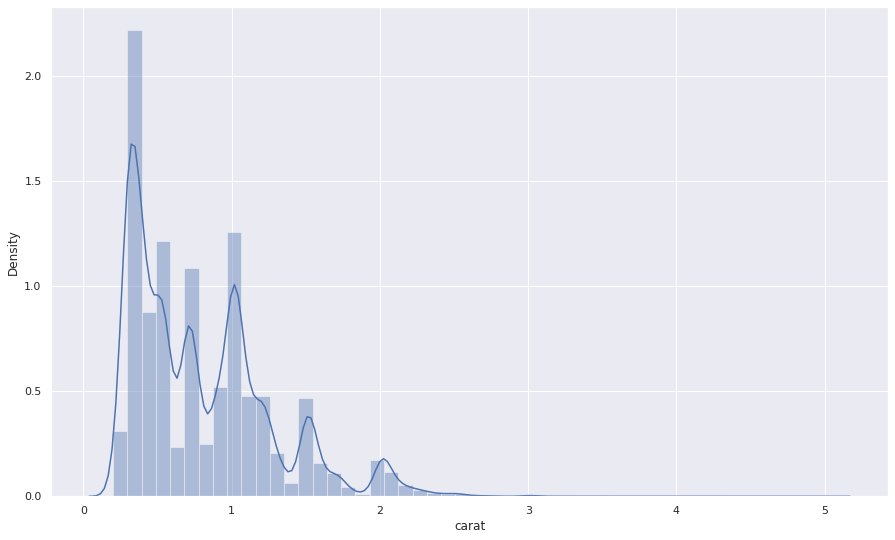

In [51]:
sns.set(rc={"figure.figsize": (15,9)})
sns.distplot(df["carat"])

In [72]:
df = df[df[y] < np.mean(df[y]) + np.std(df[y]) * 3]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


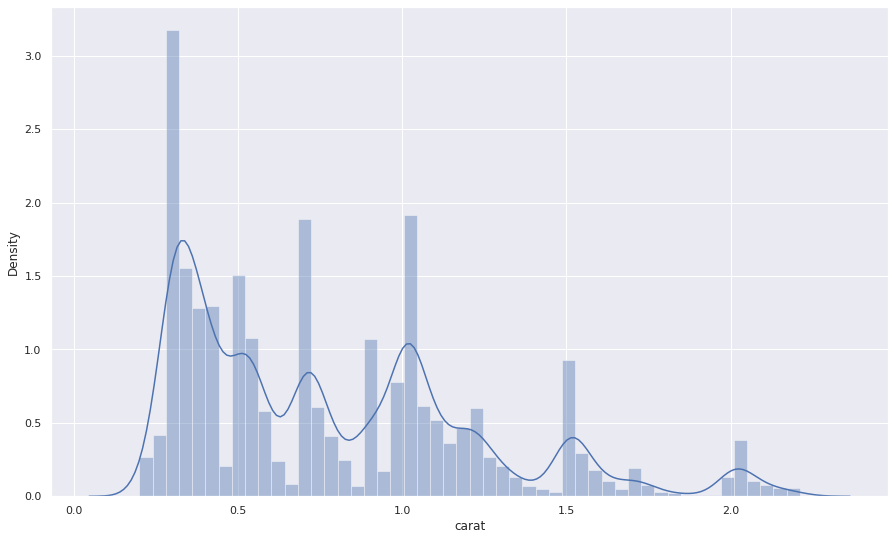

In [73]:
sns.distplot(df["carat"])

In [175]:
df_train = df[:45000]
df_test = df[45000:]

In [275]:
model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(26,), kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

In [276]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [277]:
history = model.fit(df_train[X], df_train[y], batch_size=512, epochs=50, validation_split=0.3)

Epoch 1/50
69/69 [==============================] - 1s 8ms/step - loss: 0.3056 - mae: 0.3256 - val_loss: 0.0740 - val_mae: 0.0919
Epoch 2/50
69/69 [==============================] - 0s 7ms/step - loss: 0.0593 - mae: 0.0667 - val_loss: 0.0495 - val_mae: 0.0540
Epoch 3/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0407 - mae: 0.0417 - val_loss: 0.0363 - val_mae: 0.0402
Epoch 4/50
69/69 [==============================] - 0s 5ms/step - loss: 0.0300 - mae: 0.0344 - val_loss: 0.0282 - val_mae: 0.0315
Epoch 5/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0231 - mae: 0.0298 - val_loss: 0.0232 - val_mae: 0.0305
Epoch 6/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0186 - mae: 0.0282 - val_loss: 0.0206 - val_mae: 0.0266
Epoch 7/50
69/69 [==============================] - 0s 5ms/step - loss: 0.0153 - mae: 0.0258 - val_loss: 0.0176 - val_mae: 0.0233
Epoch 8/50
69/69 [==============================] - 0s 6ms/step - loss: 0.0128 - mae: 0.02

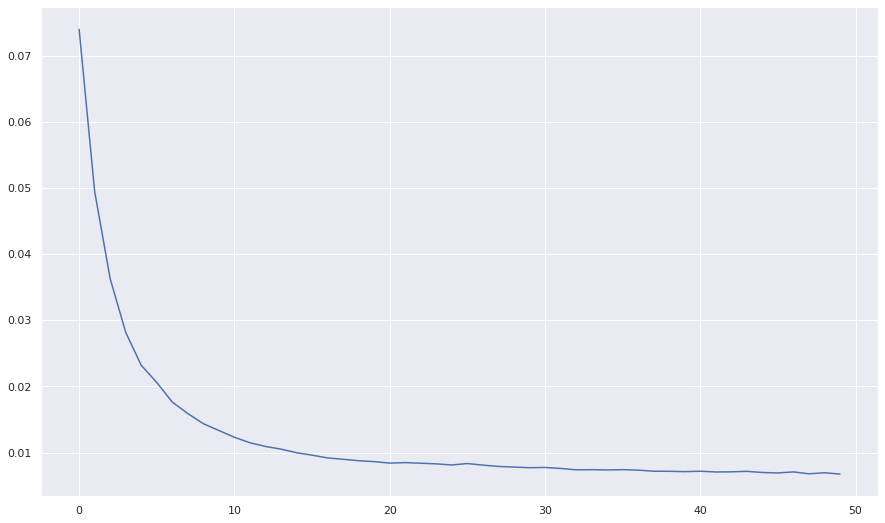

In [278]:
sns.lineplot(x=range(0,50), y=history.history["val_loss"])

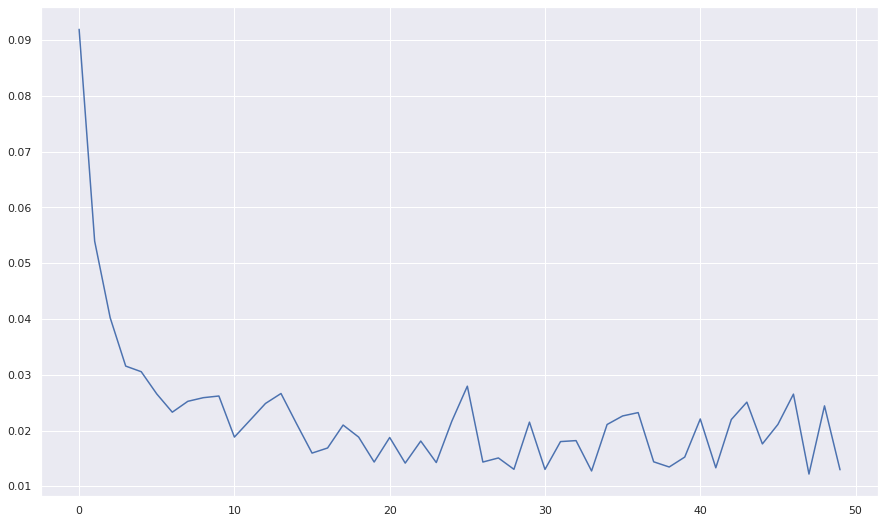

In [279]:
sns.lineplot(x=range(0,50), y=history.history["val_mae"])

In [280]:
model.evaluate(df_test[X], df_test[y])

110/110 [==============================] - 0s 3ms/step - loss: 0.0017 - mae: 0.0145


[0.001732504926621914, 0.014503984712064266]